In [12]:
import numpy as np
import pandas as pd

def benchmark(x1, x2):
    return (    (1.3356 * (1.5 * (1 - x1))) 
                + (np.exp((2 * x1) - 1) * np.sin((3 * np.pi) * ((x1 - 0.6) ** 2)))
                + (np.exp(3 * (x2 - 0.5)) * np.sin((4 * np.pi) * ((x2 - 0.9) ** 2)))
            )

def getData(grid):
    x1 = np.linspace(0, 1, grid)
    x2 = np.linspace(0, 1, grid)
    x1, x2 = np.meshgrid(x1, x2)
    f_x1_x2 = benchmark(x1, x2)
    data = {'x1': x1.flatten(), 'x2': x2.flatten(), 'f(x1,x2)': f_x1_x2.flatten()}
    df = pd.DataFrame(data)
    return df


df_1000 = getData(32)
df_test = pd.read_excel("./Kriging-data.xlsx", sheet_name="Test")
df_training = pd.read_excel("./Kriging-data.xlsx", sheet_name="Training")

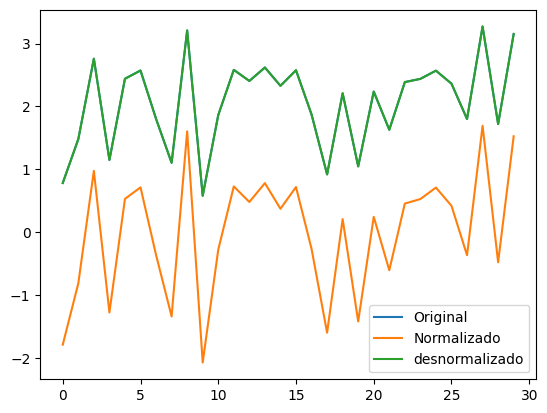

In [13]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
out_scaler = StandardScaler()

def test_out_scaler(df):
    out = df["f(x1,x2)"].values.reshape(-1, 1)  
    plt.plot(out, label='Original')
    out_scaler.fit(out)
    norm = out_scaler.transform(out)
    plt.plot(norm, label='Normalizado')
    plt.plot(out_scaler.inverse_transform(norm), label='desnormalizado')
    plt.legend()
    plt.show()

scaler.fit(np.hstack((df_training['x1'].values.reshape(-1, 1),
                       df_training['x2'].values.reshape(-1, 1))))

test_out_scaler(df_training)

In [14]:
import pandas as pd
variograms =  ["Exponential", "Gaussian", "HoleEffect", "Linear", "Original", "Power", "Spherical"]

def SumarizeForNewData():
    df = {"metric": ["r2", "mse", "mape", "rmse"]}
    for variogram in variograms:
        path = f"./{variogram}/results/results.xlsx"
        data = pd.read_excel(path, sheet_name="metrics")
        df[variogram] = data["media"]
    return pd.DataFrame(df)

def SumarizeTrainingMean():
    df = {}
    for variogram in variograms:
        path = f"./{variogram}/results/better_results.xlsx"
        data = pd.read_excel(path)
        data = data.drop(data.columns[-1], axis=1)
        mean_values = data.iloc[:, 2:].mean()
        df[variogram] = mean_values       
    return pd.DataFrame(df)

def SumarizeTraining(sort_by):
    df_dict = {}

    for variogram in variograms:
        path = f"./{variogram}/results/better_results.xlsx"
        data = pd.read_excel(path, index_col=None)
        
        data = data.sort_values(by=sort_by)
        df_dict[variogram] = data.iloc[0]
    
    df = pd.DataFrame(df_dict)
    df = (df.iloc[1:]).T
    return df

def SumarizeForNewDataModel(models):
    df = {"metric": ["r2", "mse", "mape", "rmse"]}
    for variogram, model in zip(variograms, models):
        path = f"./{variogram}/results/results.xlsx"
        data = pd.read_excel(path, sheet_name="metrics")
        df[variogram] = data["media"]
    return pd.DataFrame(df)


In [15]:
print ("++++++++++++++++++++++++++++ Métricas para o conjunto novo de 20 dados +++++++++++++++++++++++ ")
display(SumarizeForNewData())

print ("++++++++++++++++++++++++++++ Média das métricas de treinamento +++++++++++++++++++++++ ")
display(SumarizeTrainingMean())

++++++++++++++++++++++++++++ Métricas para o conjunto novo de 20 dados +++++++++++++++++++++++ 


metric  Exponential  Gaussian  HoleEffect    Linear  Original     Power  \
0     r2     0.733149  0.738855    0.581213  0.236383  0.087178  0.448104   
1    mse     0.186935  0.182937    0.293369  0.534929  0.639451  0.386614   
2   mape     0.379055  0.296262    0.407118  0.808166  0.425770  0.609293   
3   rmse     0.432359  0.427712    0.541635  0.731389  0.799657  0.621783   

   Spherical  
0   0.702623  
1   0.208319  
2   0.367377  
3   0.456419

++++++++++++++++++++++++++++ Média das métricas de treinamento +++++++++++++++++++++++ 


Exponential    Gaussian  HoleEffect        Linear    Original  \
r2           0.956838    0.982645    0.965279  2.439574e-01    0.965359   
r2_sup       0.592345    0.693602    0.592042 -8.908191e-02    0.597711   
r2_test      0.902391    0.975515    0.948075 -1.771320e+00    0.876766   
r2_val       0.929125    0.977857    0.913501 -1.514639e+18    0.733095   
r2_vt        0.919133    0.977893    0.934457 -7.659861e-01    0.920227   
mse          0.014136    0.007292    0.011821  9.204566e-02    0.017713   
mse_sup      0.242001    0.181891    0.242181  6.465261e-01    0.238816   
mse_test     0.027414    0.008222    0.016004  2.098190e-01    0.037199   
mse_val      0.021302    0.011422    0.024157  1.385812e-01    0.029468   
mse_vt       0.024358    0.009822    0.020080  1.742001e-01    0.033763   
mape         0.038277    0.021164    0.032488  1.017808e-01    0.038560   
rmse         0.102422    0.044238    0.086281  3.017063e-01    0.126644   
r2_adj       0.910078    0.963843    0.927665 -5.750888e-01    1.027906   
rsd          0.103245    0.044593    0.086974  3.041296e-01    0.131089   
aic        139.507239  144.637846  140.392495  1.348132e+02  138.419561   
bic        323.865563  328.996170  324.750819  3.191715e+02  229.497391   

               Power   Spherical  
r2          0.516551    0.920044  
r2_sup      0.223573    0.629642  
r2_test    -0.538309    0.730663  
r2_val     -0.296490    0.902384  
r2_vt      -0.322299    0.828838  
mse         0.077834    0.030909  
mse_sup     0.460920    0.219861  
mse_test    0.151802    0.095356  
mse_val     0.189530    0.027562  
mse_vt      0.170666    0.061459  
mape        0.084185    0.035790  
rmse        0.269660    0.113653  
r2_adj     -0.007186    0.833426  
rsd         0.271826    0.114566  
aic       135.368259  140.787852  
bic       319.726583  325.146176

In [16]:
print ("++++++++++++++++++++++++++++ Métricas de treinamento para o melhor modelo +++++++++++++++++++++++ ")
df = SumarizeTraining(sort_by="mse_sup")
display(df)

print ("++++++++++++++++++++++++++++ Métricas para o conjunto novo de 20 dados  melhores modelos +++++++++++++++++++++++ ")
display(SumarizeForNewDataModel(df["model"]))


++++++++++++++++++++++++++++ Métricas de treinamento para o melhor modelo +++++++++++++++++++++++ 


model        r2    r2_sup   r2_test    r2_val     r2_vt  \
Exponential  model_1_1_17  0.963127  0.654207  0.957855  0.923257  0.942815   
Gaussian     model_1_1_39  0.997388  0.715076  0.997565   0.99648  0.997151   
HoleEffect   model_1_2_17  0.984874  0.650684  0.980151  0.882886   0.96078   
Linear       model_1_9_19  0.372166  0.028576 -1.834803 -0.331273 -0.550321   
Original     model_1_6_22  0.978964  0.633587  0.894136  0.996029  0.942653   
Power        model_1_0_28  0.627789  0.485226  0.295385  -0.59932 -0.368253   
Spherical    model_1_1_41  0.994065  0.692962   0.98481  0.975616  0.981379   

                  mse   mse_sup  mse_test   mse_val    mse_vt      mape  \
Exponential  0.012077  0.205278  0.012037  0.024436  0.018236  0.043708   
Gaussian     0.001098  0.169143  0.001322  0.001352  0.001337  0.017213   
HoleEffect    0.00515  0.207369  0.008223  0.015627  0.011925   0.02525   
Linear       0.076437  0.576679  0.069667  0.191841  0.130754   0.09553   
Original     0.010756  0.217519  0.058172  0.001505  0.032986  0.021994   
Power        0.059925  0.305592  0.036214  0.254505   0.14536  0.087292   
Spherical    0.002294  0.182271  0.005632  0.008355  0.006994  0.013532   

                 rmse    r2_adj       rsd         aic         bic  \
Exponential  0.109894  0.923181  0.110776  138.832972  323.191296   
Gaussian     0.033131  0.994557  0.033397  143.629142  327.987466   
HoleEffect    0.07176  0.968488  0.072337  140.537694  324.896018   
Linear       0.276472 -0.307988  0.278693  135.142584  319.500908   
Original     0.103713  1.016945  0.107353  139.064522  230.142352   
Power        0.244796   0.22456  0.246762  135.629327  319.987651   
Spherical      0.0479  0.987635  0.048285   142.15457  326.512894   

                                                  Architecture  
Exponential  Hidden Size=[12, 2], regularizer=0.02, learnin...  
Gaussian     Hidden Size=[12, 2], regularizer=0.02, learnin...  
HoleEffect   Hidden Size=[12, 2], regularizer=0.02, learnin...  
Linear       Hidden Size=[12, 2], regularizer=0.02, learnin...  
Original     Hidden Size=[12, 2], regularizer=0.02, learnin...  
Power        Hidden Size=[12, 2], regularizer=0.02, learnin...  
Spherical    Hidden Size=[12, 2], regularizer=0.02, learnin...

++++++++++++++++++++++++++++ Métricas para o conjunto novo de 20 dados  melhores modelos +++++++++++++++++++++++ 


metric  Exponential  Gaussian  HoleEffect    Linear  Original     Power  \
0     r2     0.733149  0.738855    0.581213  0.236383  0.087178  0.448104   
1    mse     0.186935  0.182937    0.293369  0.534929  0.639451  0.386614   
2   mape     0.379055  0.296262    0.407118  0.808166  0.425770  0.609293   
3   rmse     0.432359  0.427712    0.541635  0.731389  0.799657  0.621783   

   Spherical  
0   0.702623  
1   0.208319  
2   0.367377  
3   0.456419

In [ ]:
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from scipy.spatial import Delaunay

def PlotSurface(X, Y, Z, model_name, mesh_x=80, mesh_y=100):
    x_sup, y_sup, z_sup = df_1000['x1'], df_1000['x2'], df_1000['f(x1,x2)']
    x_orig, y_orig, z_orig = df_training['x1'], df_training['x2'], df_training['f(x1,x2)']
    x_test, y_test, z_test = df_test['x1'], df_test['x2'], df_test['f(x1,x2)']


    points = np.column_stack((x_sup, y_sup))
    tri = Delaunay(points)

    # Criar a superfície original
    fig_surface = ff.create_trisurf(x=x_sup, y=y_sup, z=z_sup, simplices=tri.simplices, colormap='Greys')

    # Criar a superfície virtual
    virtual_surface = go.Surface(
        x=X.reshape(mesh_x, mesh_y),
        y=Y.reshape(mesh_x, mesh_y),
        z=Z,
        colorscale="matter_r",
        showscale=False,
        contours=dict(
            z=dict(
                show=True,
                start=np.min(Z),
                end=np.max(Z),
                size=0.05,
                usecolormap=True,
                project_z=True
            )
        )
    )
    fig = go.Figure()

    fig.add_trace(go.Scatter3d(x=x_orig, y=y_orig, z=z_orig, mode='markers',
                               marker=dict(size=5, color='red', opacity=0.8),
                               name='Training Samples', showlegend = True))
    
    fig.add_trace(go.Scatter3d(x=x_test, y=y_test, z=z_test,
                               mode='markers',
                               marker=dict(size=5, color='blue', opacity=0.8),
                               name='Test Samples', showlegend = True))

    fig.add_trace(fig_surface.data[0])

    fig.add_trace(virtual_surface)
    fig.update_layout(
        title=f'Surface fit for {model_name} variogram',
        scene=dict(
            xaxis_title='x1',
            yaxis_title='x2',
            zaxis_title='f(x1, x2)',
            aspectmode='cube',
            xaxis = dict(backgroundcolor = "white"),
            yaxis = dict(backgroundcolor = "white"),
            zaxis = dict(backgroundcolor = "white"),
        )
    )
    py.iplot(fig)

In [ ]:
import os

os.chdir("./content")

lm_dir = "tf-levenberg-marquardt"
if not os.path.exists(lm_dir):
  !git clone https://github.com/fabiodimarco/$lm_dir

os.chdir(lm_dir)

In [ ]:
import tensorflow as tf
import numpy as np
from keras import regularizers
from keras import initializers
import levenberg_marquardt as lm

# layers, neurons
class ShuffleArchitecture:
    def __init__(self, input_size, hidden_sizes, output_size, act_h, act_o, param_reg):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.act_h = act_h
        self.act_o = act_o
        self.regularizer = regularizers.L2(param_reg)
        self.initializer = initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=np.random.randint(1, 10000))

    def compute_k(self):
        total_parameters = 0
        for layer in self.model.layers:
            weights = layer.get_weights()
            if len(weights) > 0:  
                for w in weights:
                    total_parameters += np.prod(w.shape)
        return total_parameters
        
    def set_architecture(self):
        self.model = tf.keras.Sequential()
        self.model.add(tf.keras.layers.Dense(self.hidden_sizes[0],
                        input_shape=(self.input_size,),
                        activation=self.act_h,
                        kernel_regularizer=self.regularizer,
                        kernel_initializer=self.initializer,                        
                        ))  # input layer

        for size in self.hidden_sizes[1:]:  # hidden layers
            self.model.add(tf.keras.layers.Dense(size,
                            activation=self.act_h,
                            kernel_regularizer=self.regularizer,
                            kernel_initializer=self.initializer,  
                        ))

        self.model.add(tf.keras.layers.Dense(self.output_size,
                        activation=self.act_o,
                        kernel_regularizer=self.regularizer,
                        kernel_initializer=self.initializer,  
                        ))  # output layer

    def create_model(self, _learning_rate):
        self.model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
            loss=tf.keras.losses.MeanSquaredError())

        self.lm_model = lm.ModelWrapper(
            tf.keras.models.clone_model(self.model))

        self.lm_model.compile(
            optimizer=tf.keras.optimizers.SGD(learning_rate=_learning_rate),
            loss=lm.MeanSquaredError())
        return(self.lm_model)

2024-07-29 15:15:04.706410: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-29 15:15:06.265256: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-29 15:15:06.265390: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-29 15:15:06.534922: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-29 15:15:06.971542: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-29 15:15:06.972279: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [ ]:
import pickle
import numpy as np

class Rebuild:
    def __init__(self, df):
        self.df = df 

    def LoadModelWeights(self, model, fileName):        
        file = f"{self.path}/models/{fileName}.keras"
        model.load_weights(file)

    def LoadPrevDataset(self, fileName):
        fileName = fileName.replace("model", "dataset")
        pos = fileName.rfind("_")
        file = f"{self.path}/dataset/{fileName[:pos]}.pkl" 
        with open(file, 'rb') as f:
            _data, _train, _vt, _val, _test = pickle.load(f)
        self._data, self._train, self._vt, self._val, self._test = _data, _train, _vt, _val, _test    
    
    def setArchitecture(self, _hidden_sizes, _pg, _lr):
        shuffler = ShuffleArchitecture(input_size  = 2,
                                        hidden_sizes = _hidden_sizes,
                                        output_size = 1,
                                        act_h = 'tanh',
                                        act_o = 'linear',
                                        param_reg=_pg)
        shuffler.set_architecture()
        self.k = shuffler.compute_k()
        return(shuffler.create_model(_lr))            

    def getArchitecture(self, architecture):
        hidden_size = [int(x) for x in architecture.split("[")[1].split("]")[0].split(", ")]
        regularizer = float(architecture.split("regularizer=")[1].split(",")[0])
        learning_rate = float(architecture.split("learning_rate=")[1])
        return hidden_size, regularizer, learning_rate   
    
    def predictUnsampled(self, model, mesh_x=80, mesh_y=100):
        Z = np.zeros((mesh_x, mesh_y))
        dx, dy = 1 / mesh_y, 1 / mesh_x

        X = np.zeros(mesh_x * mesh_y)
        Y = np.zeros(mesh_x * mesh_y)
        
        points = np.zeros((mesh_x * mesh_y, 2))
        
        for i in range(mesh_x):
            for j in range(mesh_y):
                idx = i * mesh_y + j
                X[idx] = dx * j
                Y[idx] = dy * i
                points[idx] = [X[idx], Y[idx]]

        points = scaler.transform(points)
        Z_flat = model.predict(points)
        Z_flat = out_scaler.inverse_transform(Z_flat)

        Z = Z_flat.reshape((mesh_x, mesh_y))

        return X, Y, Z

    def rebuildFullNet(self):
        for file_model, architecture, variogram in zip(self.df["model"], self.df["Architecture"], df.index):
            print(file_model, architecture, variogram)
            self.path = f'../../{variogram}/content'
            hidden_size, regularizer, learning_rate = self.getArchitecture(architecture)
            self.lm_model = self.setArchitecture(hidden_size, regularizer, learning_rate)
            self.LoadModelWeights(self.lm_model, file_model)
            self.LoadPrevDataset(file_model)
            X, Y, Z = self.predictUnsampled(self.lm_model)
            PlotSurface(X, Y, Z, variogram)

In [ ]:
Rebuilder = Rebuild(df)
Rebuilder.rebuildFullNet()

model_1_8_3 Hidden Size=[2, 12], regularizer=0.02, learning_rate=0.01 Exponential
 27/250 [==>...........................] - ETA: 0s

250/250 [==============================] - 1s 2ms/step


model_1_7_2 Hidden Size=[2, 12], regularizer=0.02, learning_rate=0.01 Gaussian
250/250 [==============================] - 0s 2ms/step


model_1_9_16 Hidden Size=[2, 12], regularizer=0.02, learning_rate=0.01 HoleEffect
250/250 [==============================] - 1s 2ms/step


model_1_9_17 Hidden Size=[2, 12], regularizer=0.02, learning_rate=0.01 Linear
250/250 [==============================] - 1s 2ms/step


model_1_2_0 Hidden Size=[2, 12], regularizer=0.02, learning_rate=0.01 Original
250/250 [==============================] - 1s 2ms/step


model_1_8_21 Hidden Size=[2, 12], regularizer=0.02, learning_rate=0.01 Power
250/250 [==============================] - 0s 2ms/step


model_1_9_23 Hidden Size=[2, 12], regularizer=0.02, learning_rate=0.01 Spherical
250/250 [==============================] - 1s 2ms/step
